In [6]:
# Import the required libraries and dependencies
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go



In [289]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("Resources/survey.csv")

# Preview the dataset
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
data = pd.read_csv("Resources/survey.csv")
df = pd.DataFrame(data) 
  
X = list(df.iloc[:, 0]) 
Y = list(df.iloc[:, 1]) 

In [291]:
print('check for null values')
df.isna().sum()

check for null values


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [293]:
print('check for null values')
df.isna().sum()

check for null values


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [295]:
print('drop uncessary columns')
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], axis=1, inplace = True)

drop uncessary columns


In [297]:
print("drop nulls")
''' need to filter before running this:
df.dropna(how='any', axis=0, inplace=True)
'''

drop nulls


" need to filter before running this:\ndf.dropna(how='any', axis=0, inplace=True)\n"

In [299]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   self_employed              1241 non-null   object
 3   family_history             1259 non-null   object
 4   treatment                  1259 non-null   object
 5   work_interfere             995 non-null    object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [303]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                    'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female','femail', 'Cis Female', 'cis-female/femme', 
                    'Femake', 'Female (cis)','woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All','ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?','Guy (-ish) ^_^', 'Trans woman',], 'Others', inplace = True)

In [305]:
print('Checking for irrelevancy: ')
df['Age'].unique()

Checking for irrelevancy: 


array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [319]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

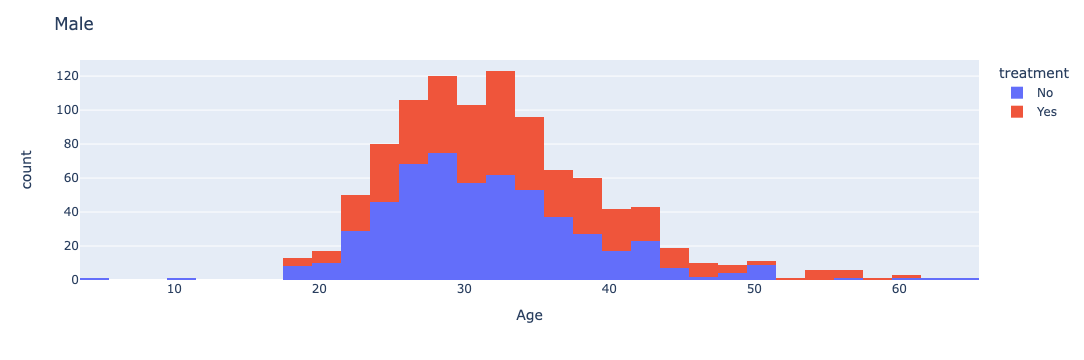

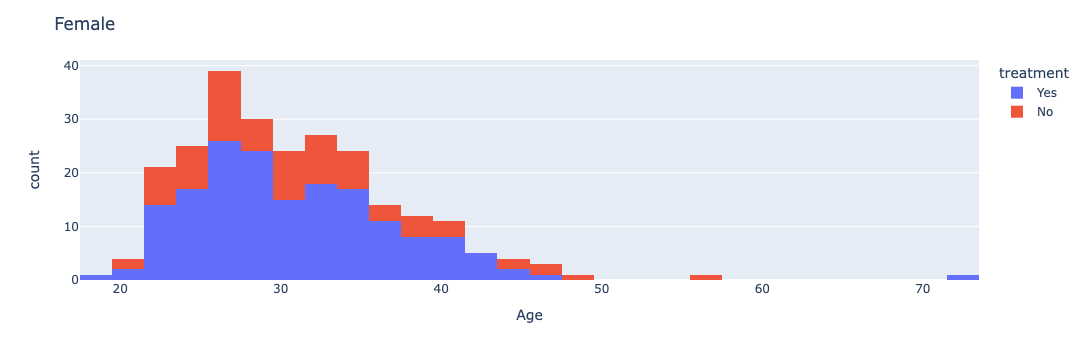

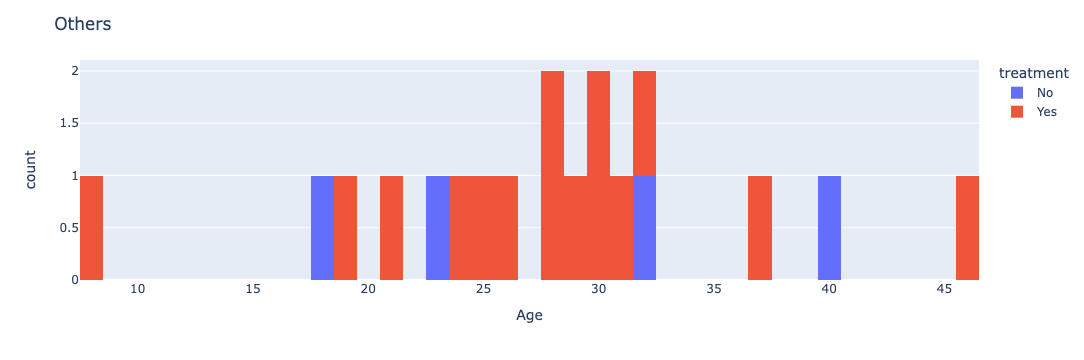

In [333]:
# This visualization shows a breakdown of respondents receiving  mental health treatments based on their gender.
for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender']==i].copy()
    fig = px.histogram(t, x='Age',nbins=40,color='treatment')
    fig.update_layout(
    title=i)
    fig.show()

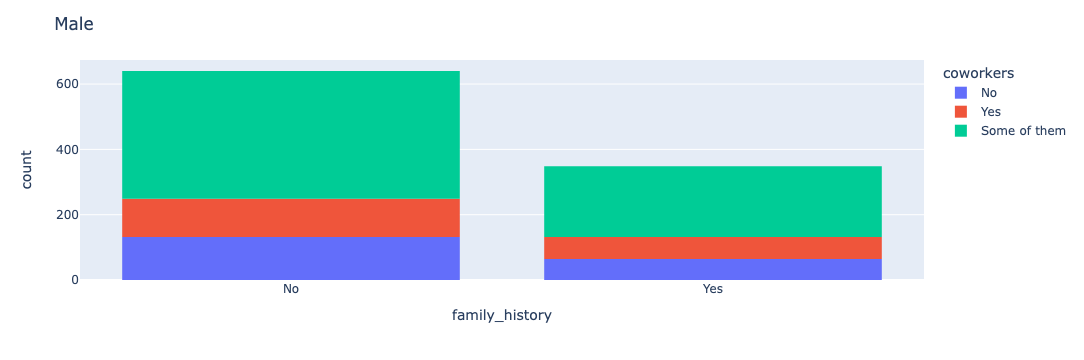

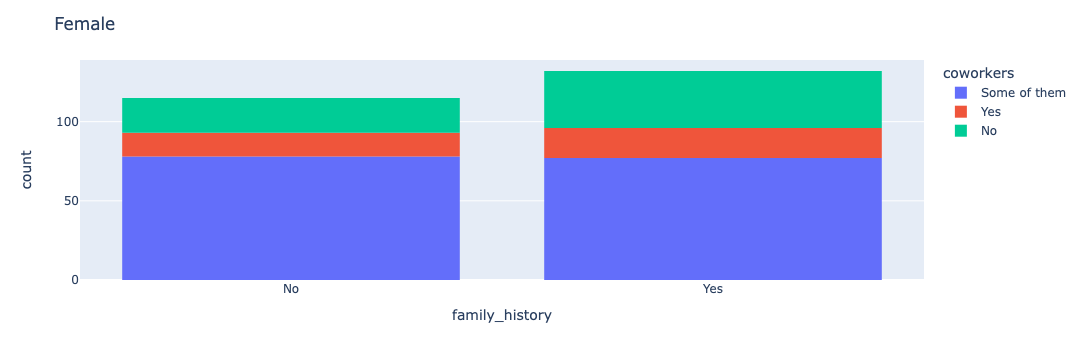

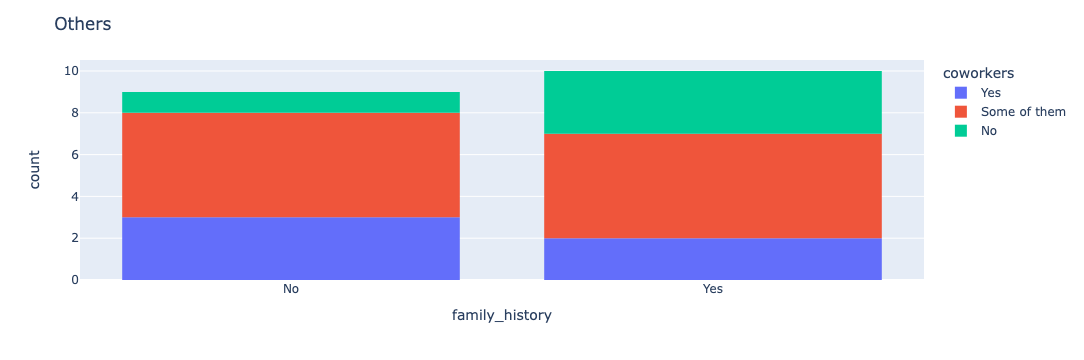

In [331]:
# This visualization shows how having a family history of mental illness affects the employee’s 
# willingness to discuss their mental health situation with their peers. Gender based division 
# is also made to better understand the changing trends within the genders

for i in ['Male', 'Female', 'Others']:
    t = df[df['Gender']==i].copy()
    fig = px.histogram(t, x='family_history',nbins=40,color='coworkers')
    fig.update_layout(
    title=i)
    fig.show()

C:\Users\natas\AppData\Local\Temp\ipykernel_10988\3993745186.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df[df['treatment'] == 'Yes'].groupby('Age Group').size()
C:\Users\natas\AppData\Local\Temp\ipykernel_10988\3993745186.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_age_counts = df.groupby('Age Group').size()


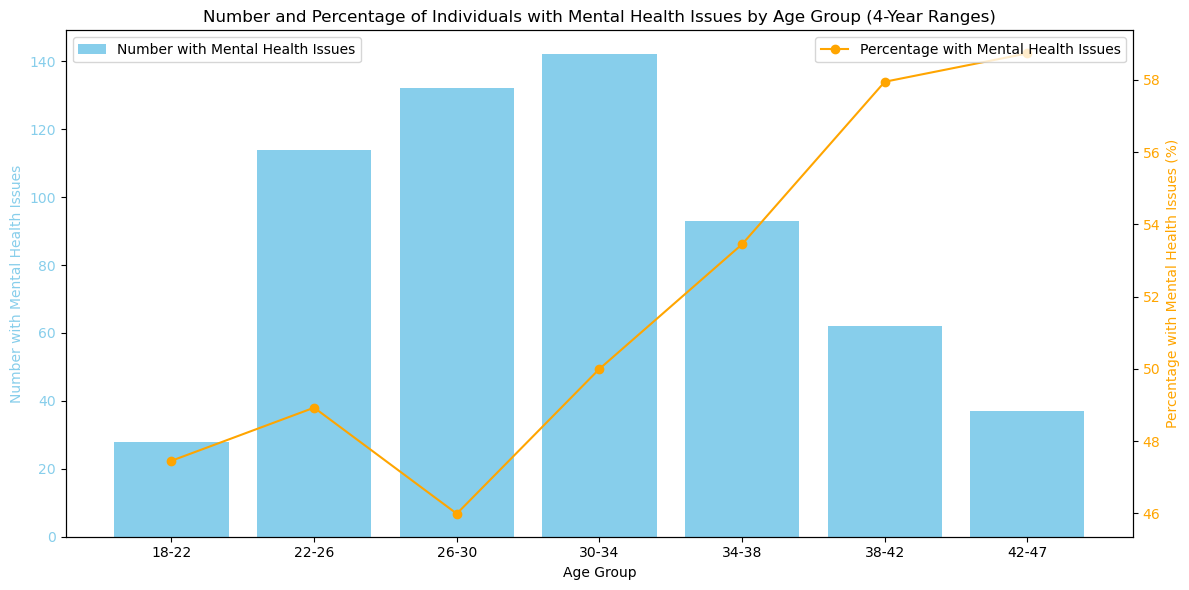

In [9]:
# Define the number of years per age group
years_per_group = 4

# Calculate the number of age groups based on the age range (18-47) and years per group
num_groups = (47 - 18) // years_per_group  # This calculates the number of full 4-year groups

# Create age bins with ranges of 4 years
age_bins = np.linspace(18, 47, num=num_groups+1, endpoint=True)

# Create age labels based on the bins
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(num_groups)]

# Create a new column 'Age Group' based on the age bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of individuals with mental health issues in each age group
age_group_counts = df[df['treatment'] == 'Yes'].groupby('Age Group').size()

# Count the total number of individuals in each age group
total_age_counts = df.groupby('Age Group').size()

# Calculate the percentage of individuals with mental health issues in each age group
percentage_mental_health = (age_group_counts / total_age_counts) * 100

# Plotting the counts and percentages
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting counts
ax1.bar(age_labels, age_group_counts, color='skyblue', label='Number with Mental Health Issues')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number with Mental Health Issues', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Adding a secondary y-axis for percentages
ax2 = ax1.twinx()
ax2.plot(age_labels, percentage_mental_health, color='orange', marker='o', label='Percentage with Mental Health Issues')
ax2.set_ylabel('Percentage with Mental Health Issues (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding title and rotating x-axis labels
plt.title('Number and Percentage of Individuals with Mental Health Issues by Age Group (4-Year Ranges)')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

In [10]:
unique_gender = data['Gender'].str.lower().unique()

# Stratas of Gender category
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", 
            "male ", "man","msle", "mail", "malr","cis man", "Cis Male", 
            "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", 
             "non-binary","nah", "all", "enby", "fluid", "genderqueer", 
             "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", 
             "trans woman", "neuter", "female (trans)", "queer", 
             "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ", 
              "cis-female/femme", "female (cis)", "femail"]

# Iterate over rows and replace the inconsistent data with right data
for (row, col) in data.iterrows():
    if str.lower(col['Gender']) in male_str:
        data['Gender'].replace(to_replace=col['Gender'], value='male', inplace=True)
        
    if str.lower(col['Gender']) in female_str:
        data['Gender'].replace(to_replace=col['Gender'], value='female', inplace=True)
        
    if str.lower(col['Gender']) in trans_str:
        data['Gender'].replace(to_replace=col['Gender'], value='trans', inplace=True)

# Remove rest of the unnecessary text
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

# Display the unique value of Gender feature
print(data['Gender'].unique())

['female' 'male' 'trans']


Percentage of individuals with mental health issues by gender:
Gender
female    68.825911
male      45.408678
trans     78.947368
dtype: float64


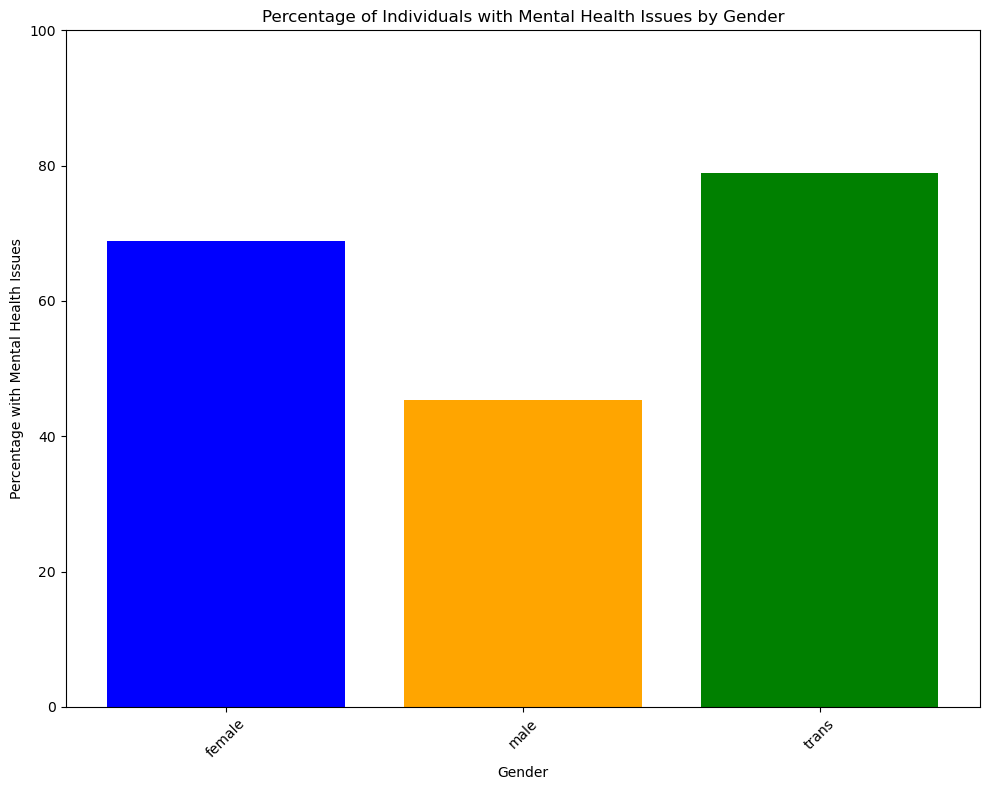

In [11]:
# Filter the DataFrame for rows where 'Gender' is 'Female' or 'Male' or 'Trans'
gender_filtered = df[df['Gender'].isin(['female', 'male', 'trans'])]

# Count the number of rows for each gender where 'treatment' is 'Yes'
gender_mental_health_counts = gender_filtered[gender_filtered['treatment'] == 'Yes'].groupby('Gender').size()

# Calculate the percentage for each gender
total_gender_counts = gender_filtered.groupby('Gender').size()
percentage_mental_health = (gender_mental_health_counts / total_gender_counts) * 100

print("Percentage of individuals with mental health issues by gender:")
print(percentage_mental_health)
plt.figure(figsize=(10, 8))
plt.bar(percentage_mental_health.index, percentage_mental_health.values, color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Mental Health Issues')
plt.title('Percentage of Individuals with Mental Health Issues by Gender')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentages
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\natas\AppData\Local\Temp\ipykernel_10988\2004945769.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df[df['treatment'] == 'Yes'].groupby('Age Group').size()
C:\Users\natas\AppData\Local\Temp\ipykernel_10988\2004945769.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_age_counts = df.groupby('Age Group').size()


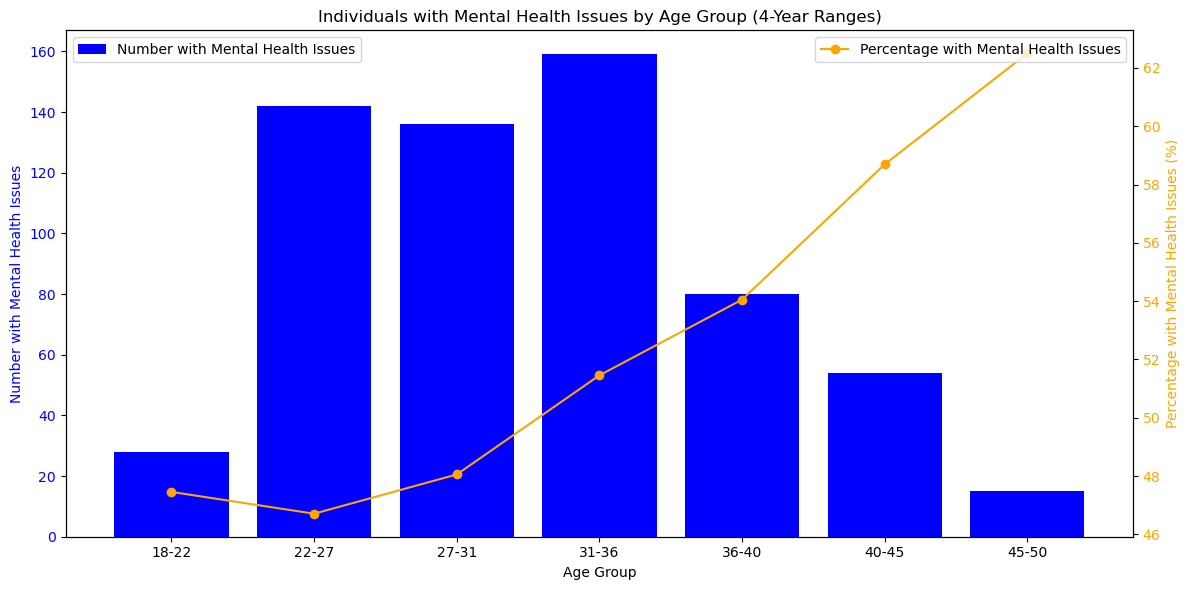

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of years per age group
years_per_group = 4

# Calculate the number of age groups based on the age range (18-47) and years per group
num_groups = (47 - 18) // years_per_group  # This calculates the number of full 4-year groups

# Create age bins with ranges of 4 years
age_bins = np.linspace(18, 50, num=num_groups+1, endpoint=True)

# Create age labels based on the bins
age_labels = [f'{int(age_bins[i])}-{int(age_bins[i+1])}' for i in range(num_groups)]

# Create a new column 'Age Group' based on the age bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of individuals with mental health issues in each age group
age_group_counts = df[df['treatment'] == 'Yes'].groupby('Age Group').size()

# Count the total number of individuals in each age group
total_age_counts = df.groupby('Age Group').size()

# Calculate the percentage of individuals with mental health issues in each age group
percentage_mental_health = (age_group_counts / total_age_counts) * 100

# Plotting the counts and percentages
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting counts
ax1.bar(age_labels, age_group_counts, color='blue', label='Number with Mental Health Issues')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number with Mental Health Issues', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Adding a secondary y-axis for percentages
ax2 = ax1.twinx()
ax2.plot(age_labels, percentage_mental_health, color='orange', marker='o', label='Percentage with Mental Health Issues')
ax2.set_ylabel('Percentage with Mental Health Issues (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adding title and rotating x-axis labels
plt.title('Individuals with Mental Health Issues by Age Group (4-Year Ranges)')
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

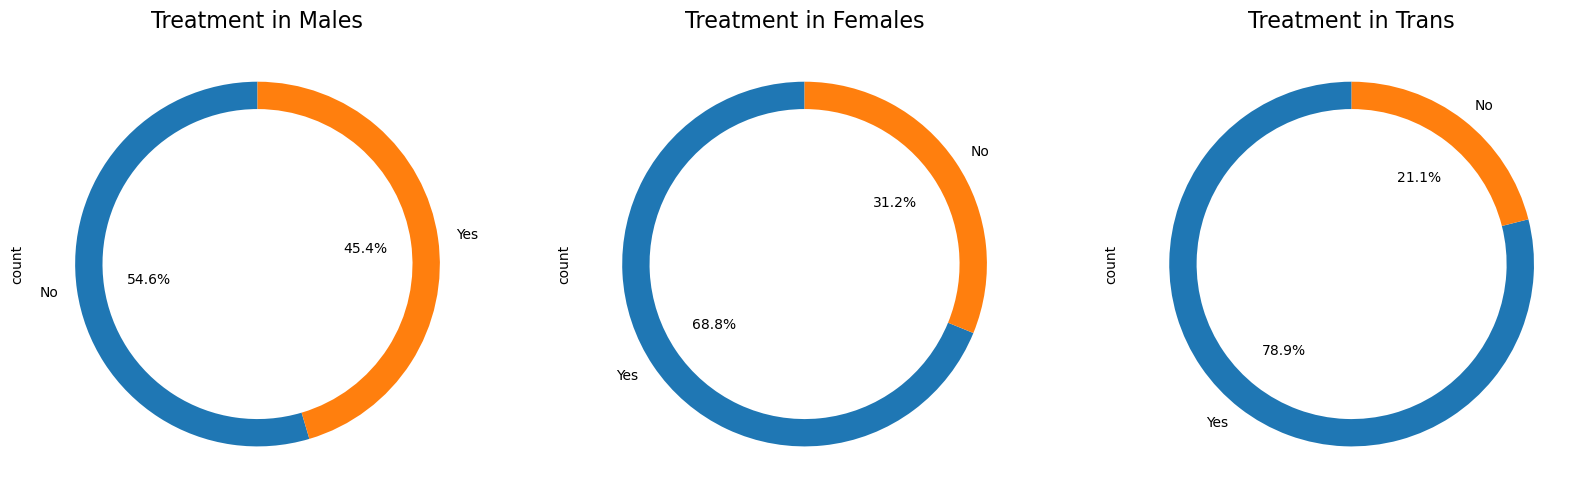

In [13]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
data['treatment'][data['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
data['treatment'][data['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
data['treatment'][data['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

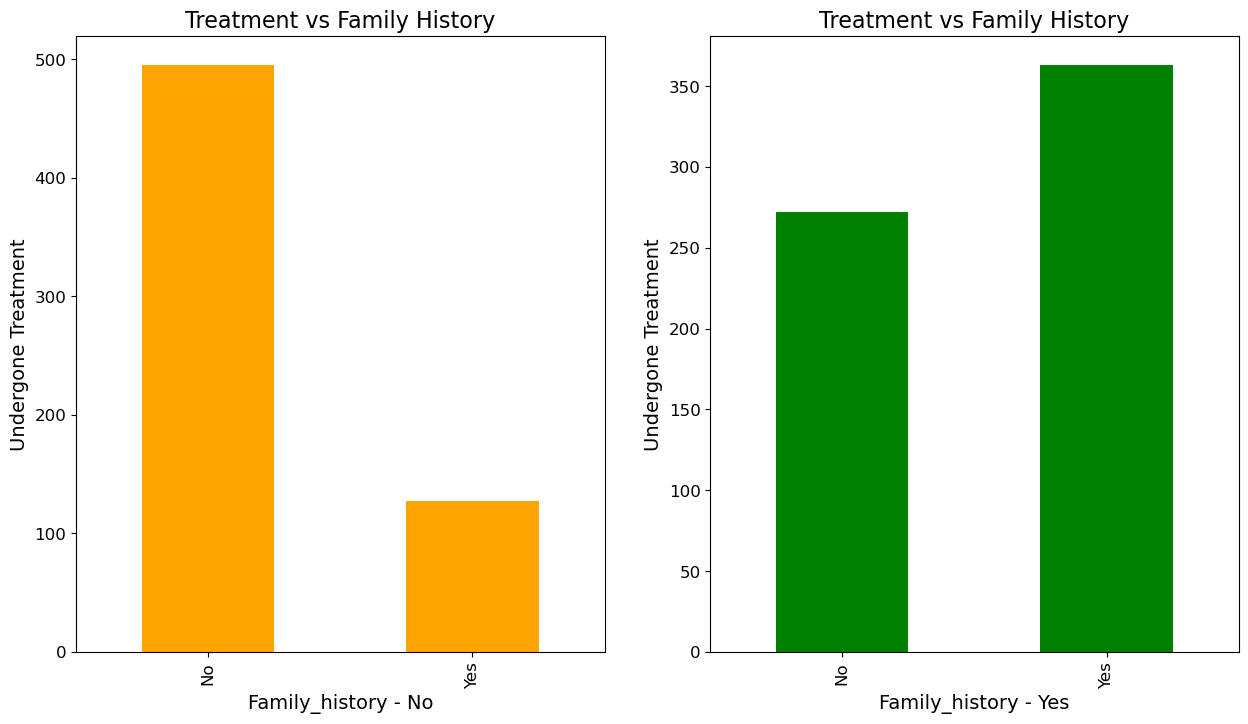

In [14]:
figure = plt.figure(figsize=[15, 8])

plt.subplot(1,2,1)
data.groupby(['treatment','family_history'])['family_history'].count()['No'].plot.bar(color='orange')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - No', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)

plt.subplot(1,2,2)
data.groupby(['treatment','family_history'])['family_history'].count()['Yes'].plot.bar(color='green')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Family_history - Yes', size=14)
plt.ylabel(ylabel='Undergone Treatment', size=14)
plt.title(label='Treatment vs Family History', size=16)


plt.show()